In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [2]:
paths = []
labels = []

for dirname, _, filenames in os.walk(r'C:\Users\DELL\Downloads\archive\TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('DataSet is Loaded')

DataSet is Loaded


In [3]:
paths[:5]

['C:\\Users\\DELL\\Downloads\\archive\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'C:\\Users\\DELL\\Downloads\\archive\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'C:\\Users\\DELL\\Downloads\\archive\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'C:\\Users\\DELL\\Downloads\\archive\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'C:\\Users\\DELL\\Downloads\\archive\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [4]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [5]:
df=pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()

,speech,label
0,C:\Users\DELL\Downloads\archive\TESS Toronto e...,angry
1,C:\Users\DELL\Downloads\archive\TESS Toronto e...,angry
2,C:\Users\DELL\Downloads\archive\TESS Toronto e...,angry
3,C:\Users\DELL\Downloads\archive\TESS Toronto e...,angry
4,C:\Users\DELL\Downloads\archive\TESS Toronto e...,angry


In [6]:
df['label'].value_counts()

angry      800
disgust    800
fear       800
happy      800
neutral    800
ps         800
sad        800
Name: label, dtype: int64

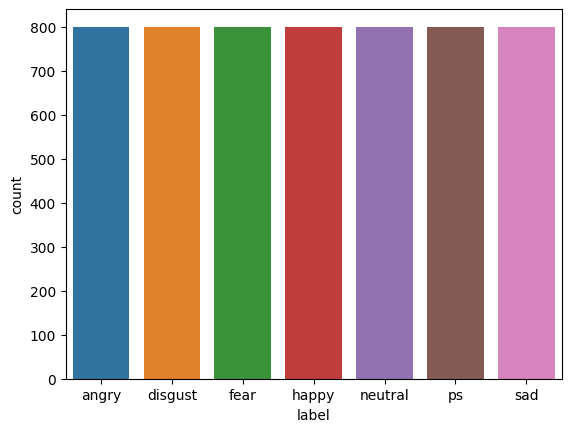

In [7]:
sns.countplot(data=df,x='label');

In [8]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size = 20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
    
    
def spectrogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize = (11,4))
    plt.title(emotion, size = 20)
    librosa.display.specshow(xdb, sr = sr, x_axis = 'time', y_axis = 'hz' )
    plt.colorbar()

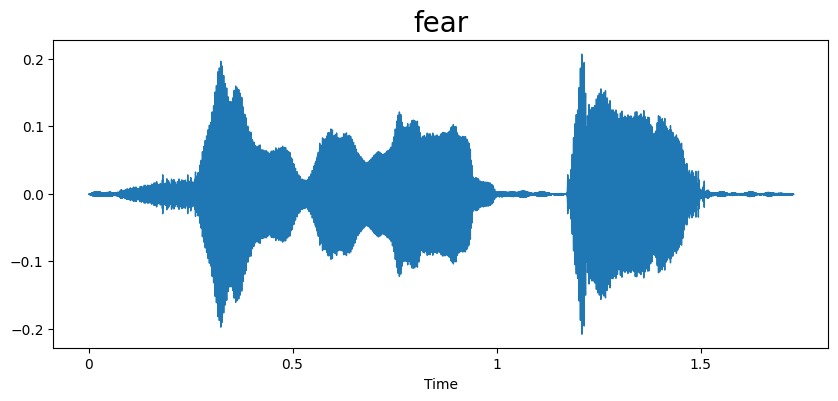

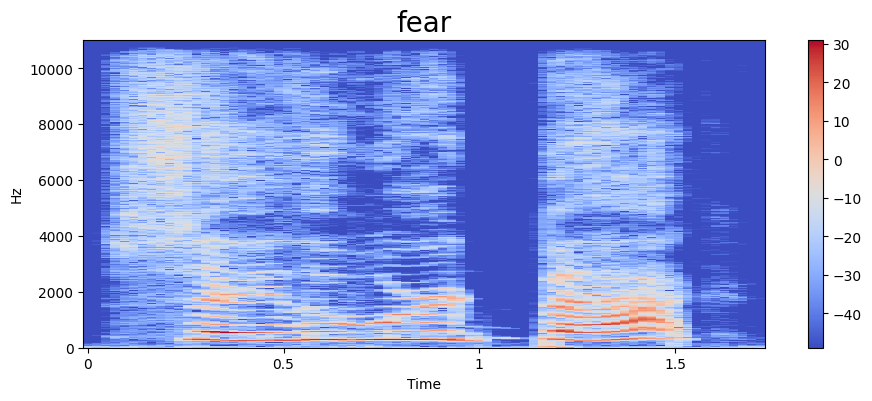

In [9]:
emotion='fear'
path=df['speech'][df['label']==emotion].iloc[0]
data,sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)


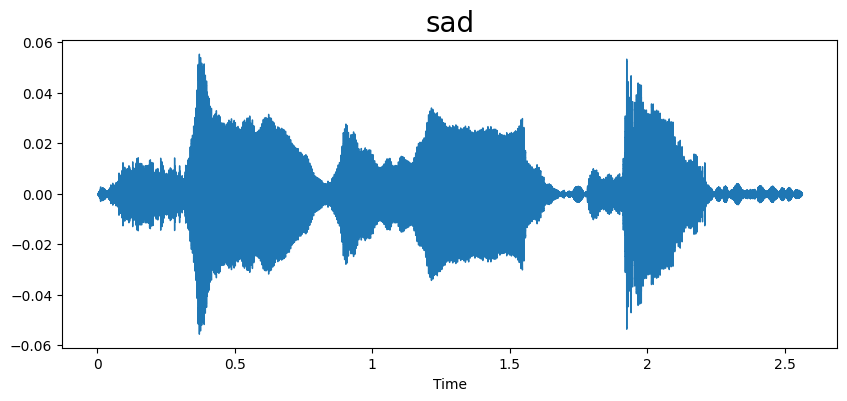

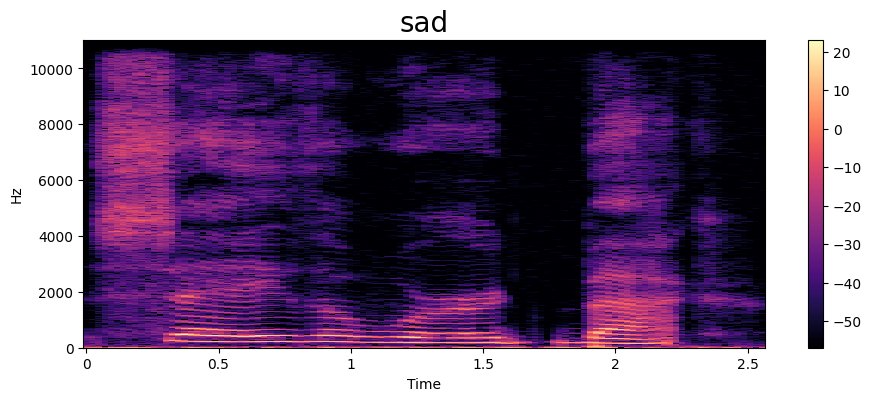

In [10]:
emotion='sad'
path = df['speech'][df['label'] == emotion].iloc[0]
data,sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)


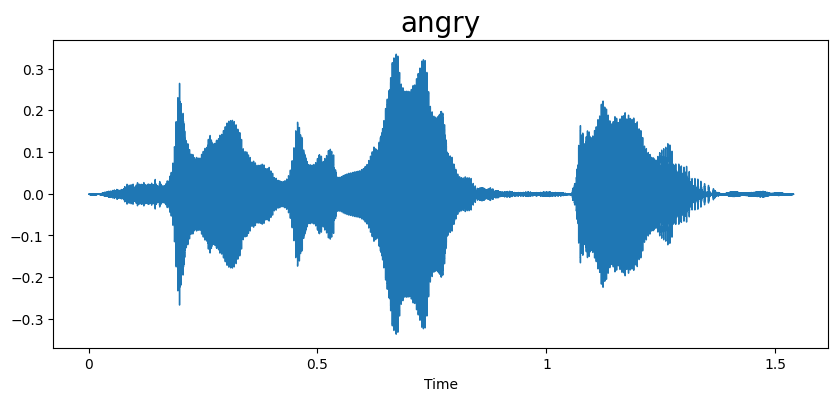

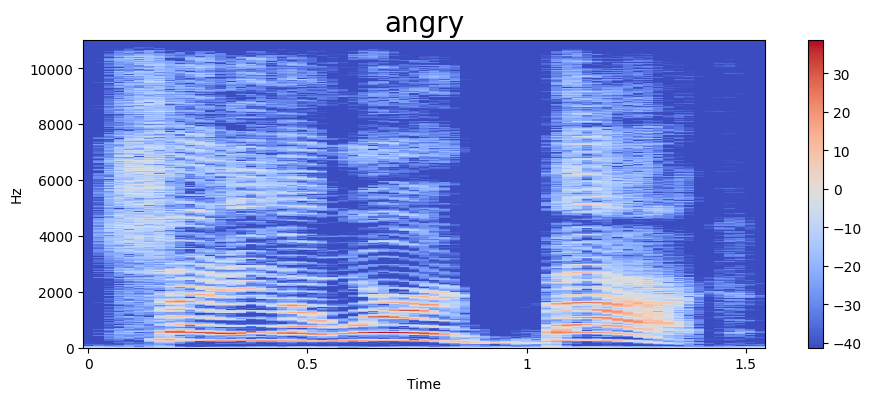

In [11]:
emotion='angry'
path = df['speech'][df['label'] == emotion].iloc[0]
data,sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

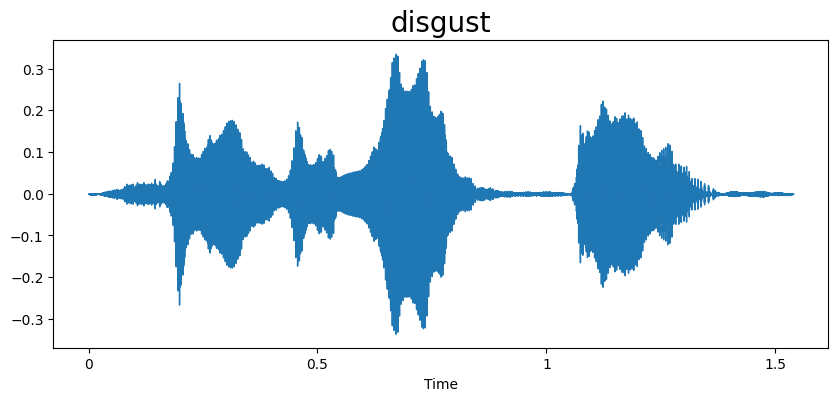

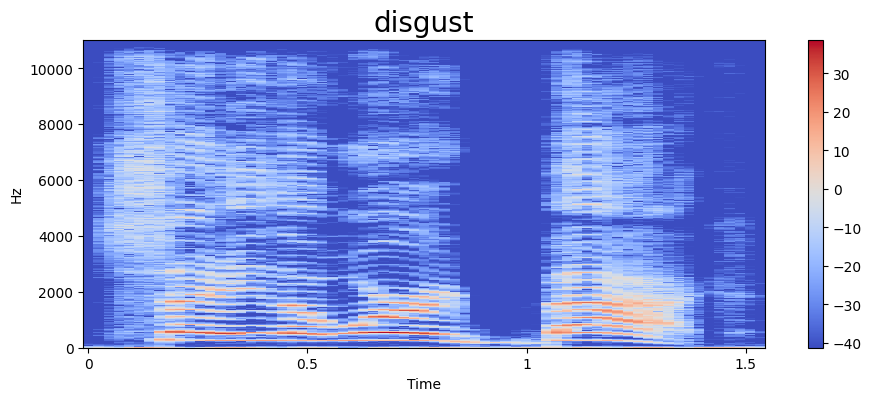

In [12]:
emotion='disgust'
data,sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

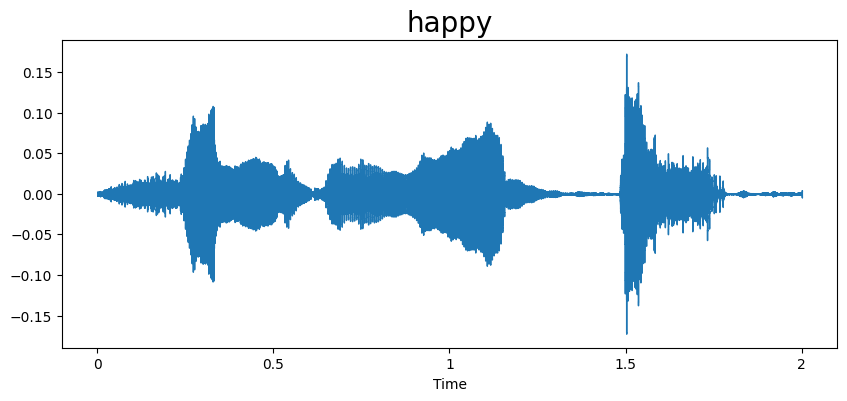

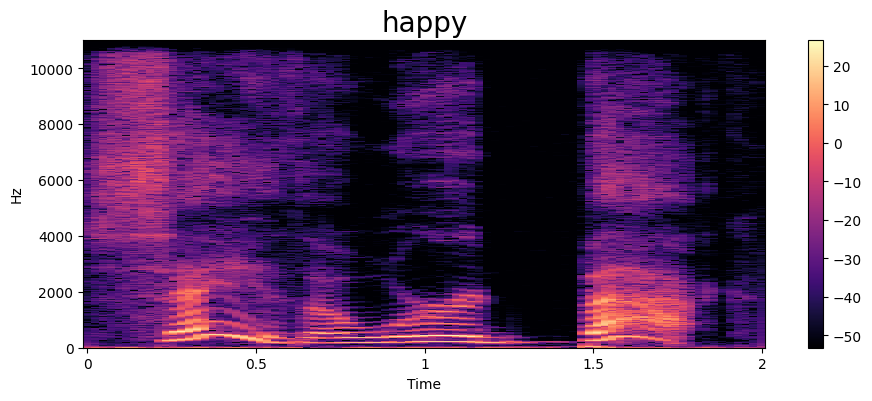

In [13]:
emotion='happy'
path = df['speech'][df['label'] == emotion].iloc[0]
data,sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

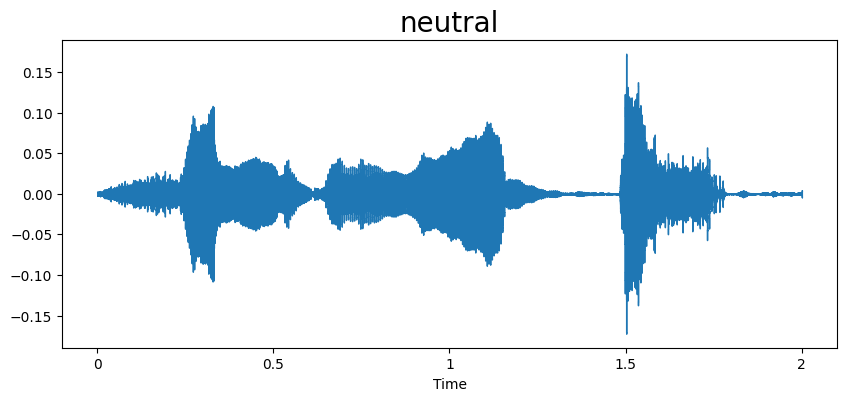

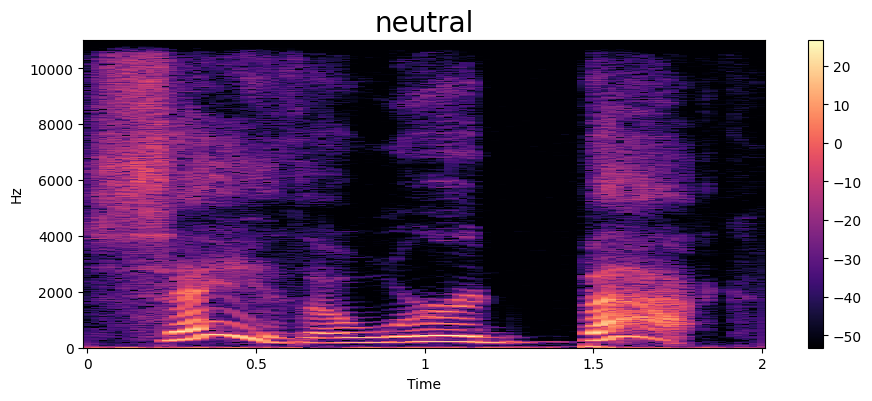

In [14]:
emotion='neutral'
data,sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

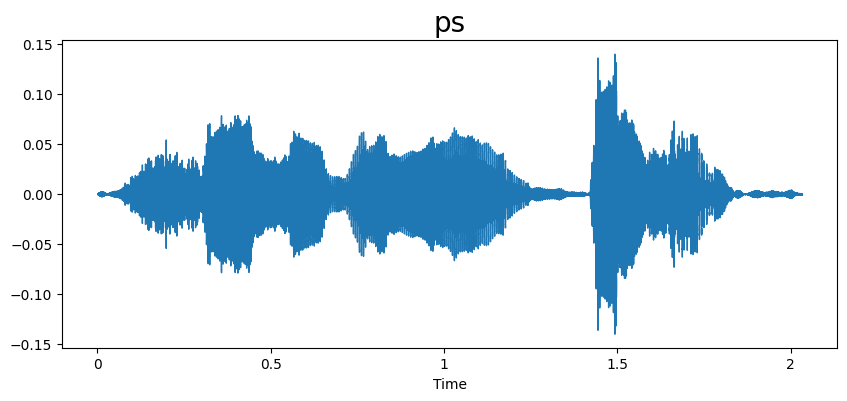

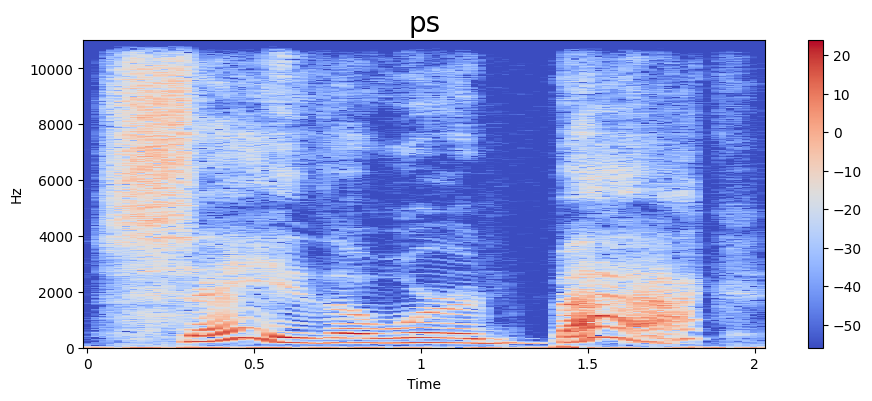

In [15]:
emotion='ps'
path = df['speech'][df['label'] == emotion].iloc[0]
data,sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

In [16]:
def extract_mfcc(filename):
    y,sr=librosa.load(filename,duration=3,offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr = sr, n_mfcc = 40).T, axis = 0)
    return mfcc

In [17]:
extract_mfcc(df['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275578e+00,  1.00753632e+01, -2.03667068e+01, -6.09245014e+00,
       -7.21228313e+00, -5.57365894e-01, -1.83255363e+00,  2.02101767e-01,
        7.27550745e-01,  1.31773770e+00,  2.88633752e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651104e+00, -1.62115932e+00, -1.02398405e+01,
       -7.55126143e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722819e-01,  5.11131477e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996351e+00, -1.82390726e+00,
        4.86896276e+00,  9.31392288e+00,  2.08915043e+00, -1.90649104e+00],
      dtype=float32)

In [18]:
x_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))


In [19]:
x_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.65600884, -32.74544, ...
2       [-429.79196, 46.124, 1.5550473, -0.21709493, 2...
3       [-403.46118, 76.32369, -12.531774, -22.288858,...
4       [-434.05756, 77.4455, 10.8655, 16.092943, 8.04...
                              ...                        
5595    [-406.48053, 80.379875, 32.462395, 46.579094, ...
5596    [-426.90918, 102.54757, 24.800041, 43.048096, ...
5597    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
5598    [-434.8618, 89.90637, 28.373262, 39.57707, -2....
5599    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 5600, dtype: object

In [20]:
x = [x for x in x_mfcc]
x = np.array(x)
x.shape

(5600, 40)

In [21]:
x=np.expand_dims(x,-1)
x.shape

(5600, 40, 1)

In [22]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [23]:
y=y.toarray()

In [24]:
y.shape

(5600, 7)

In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences = False, input_shape=(40,1)),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.2),
    Dense(7, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-traina

In [26]:
history=model.fit(x,y,validation_split=0.2, epochs = 100, batch_size =512, shuffle = True)

Epoch 1/100
9/9 [==============================] - 10s 377ms/step - loss: 1.8400 - accuracy: 0.3029 - val_loss: 1.8471 - val_accuracy: 0.2411
Epoch 2/100
9/9 [==============================] - 3s 289ms/step - loss: 1.5264 - accuracy: 0.4589 - val_loss: 1.4649 - val_accuracy: 0.4580
Epoch 3/100
9/9 [==============================] - 3s 283ms/step - loss: 1.1833 - accuracy: 0.5587 - val_loss: 1.0118 - val_accuracy: 0.6036
Epoch 4/100
9/9 [==============================] - 2s 274ms/step - loss: 0.9462 - accuracy: 0.6105 - val_loss: 0.7895 - val_accuracy: 0.6589
Epoch 5/100
9/9 [==============================] - 2s 275ms/step - loss: 0.7535 - accuracy: 0.7103 - val_loss: 0.5972 - val_accuracy: 0.7563
Epoch 6/100
9/9 [==============================] - 2s 275ms/step - loss: 0.5650 - accuracy: 0.7937 - val_loss: 0.3134 - val_accuracy: 0.9223
Epoch 7/100
9/9 [==============================] - 2s 277ms/step - loss: 0.4125 - accuracy: 0.8612 - val_loss: 0.2281 - val_accuracy: 0.9420
Epoch 8/100


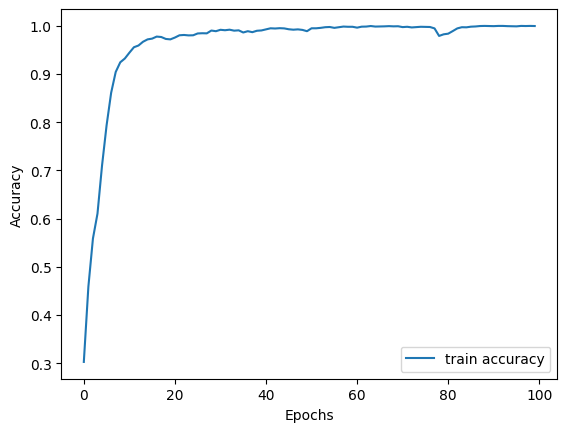

In [27]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label = 'train accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
cc = history.history['accuracy']
mean_accuracy = sum(acc)/len(acc)
mean_accuracy*100

96.22723212838173